In [6]:
# A. Initialization/Quickstart

In [1]:
import util

In [2]:
util.load_table('dummy_pat', 'dummy.db')

,name,dob,username,password,email,phone,id
0,Karen Todd,08/08/13,karentodd080813,kQygJjjblw,karen.todd@test.com.sg,85319943,0
1,Veronica Rodriguez,75/06/02,veronicarodriguez750602,PXpGxAOB,veronica.rodriguez@test.com.sg,88742016,1
2,Joshua Boyd,58/01/17,joshuaboyd580117,muIhgEVgj,joshua.boyd@test.com.sg,95423509,2
3,Stanley Hamilton,08/10/29,stanleyhamilton081029,qbfHZLnO,stanley.hamilton@test.com.sg,80946989,3
4,Melissa Campbell,14/02/10,melissacampbell140210,XBUuBzPLu,melissa.campbell@test.com.sg,89831388,4
...,...,...,...,...,...,...,...
495,Joanne Dorsey,23/02/18,joannedorsey230218,lXoRVddK,joanne.dorsey@test.com.sg,97807442,495
496,Kelly Anderson,39/07/17,kellyanderson390717,iNSFrQpt,kelly.anderson@test.com.sg,85326997,496
497,Jonathan Parker,01/02/05,jonathanparker010205,BVGqlQxrrn,jonathan.parker@test.com.sg,97885874,497
498,Michael Wade,19/11/28,michaelwade191128,lOIIfMflPrVG,michael.wade@test.com.sg,99371892,498


In [5]:
util.load_table('dummy_est', 'dummy.db')

,timestamp,name,username,password,email,phone,sublocs,max_cap,open_days,open_time,close_time,max_group_size,default_duration,days_in_advance,id
0,20/10/27_17:25:48.893611,"Jackson, Dunn and Williams",jacksondunnandwilliams2780,krSBzzcGYwpZ,jacksondunnandwilliams2780@test.com.sg,60660279,-,53,12345,1200,1830,5,45,1,0
1,20/10/27_17:25:48.894140,Humphrey-Singleton,humphreysingleton4490,CAkFRlYaX,humphreysingleton4490@test.com.sg,68563440,"{""S0"":1,""S1"":5,""S2"":9,""S3"":6,""S4"":1,""S5"":6,""S6...",99,123456,0900,1700,5,45,0,1
2,20/10/27_17:25:48.894415,"Macias, Parker and Rice",maciasparkerandrice2556,YxEImRehJN,maciasparkerandrice2556@test.com.sg,67929270,-,96,123456,1130,1830,5,30,2,2
3,20/10/27_17:25:48.894707,Best PLC,bestplc5637,BnzGCucIul,bestplc5637@test.com.sg,62835463,"{""S0"":1,""S1"":4,""S2"":5,""S3"":3,""S4"":9,""S5"":6,""S6...",87,123456,1200,1700,5,15,1,3
4,20/10/27_17:25:48.894880,Swanson LLC,swansonllc2908,PWcUTkjq,swansonllc2908@test.com.sg,60703905,"{""S0"":9,""S1"":1,""S2"":6,""S3"":1,""S4"":4,""S5"":8,""S6...",78,1234567,1100,1600,5,30,2,4


In [ ]:
# B. Create New Reservation

In [18]:
from ira import Agent

In [6]:
session = '001'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'bestplc5637'

time_in = '20/11/11_12:34'
n_person = '2'

# customer request with [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

Available time slot(s): 
(1) Wednesday 11 November 2020 at 12:30
(2) Wednesday 11 November 2020 at 12:15
(3) Wednesday 11 November 2020 at 12:45
(4) Tuesday 10 November 2020 at 12:30
(5) Thursday 12 November 2020 at 12:30


In [7]:
selection = '20/11/11_12:30'

# customer chooses [selection]
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Reservation for 2 on Wednesday 11 November 2020 at 12:30 has been confirmed


In [ ]:
# C. Change Existing Reservation

In [9]:
session = '002'
intent = 'ChangeReservation'
patron = 'veronicarodriguez750602'
establishment = 'bestplc5637'

# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Wednesday 11 November 2020 at 12:30
(2) Wednesday 18 November 2020 at 13:00
(3) Wednesday 18 November 2020 at 12:00
(4) Friday 13 November 2020 at 12:00
(5) Wednesday 11 November 2020 at 14:00
(6) Tuesday 10 November 2020 at 14:30
(7) Monday 09 November 2020 at 14:30


In [10]:
selection1 = '20/11/11_12:30'

# customer chooses [selection] from existing to change
response = Agent(session, intent, patron, establishment, selection=selection1).check_rules()
print(response[1])

How many persons would need to be admitted at which date and time, please?


In [11]:
time_in = '20/11/11_13:00'
n_person = '5'

# customer request with NEW [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

Available time slot(s): 
(1) Wednesday 11 November 2020 at 13:00
(2) Wednesday 11 November 2020 at 12:45
(3) Wednesday 11 November 2020 at 13:15
(4) Tuesday 10 November 2020 at 13:00
(5) Thursday 12 November 2020 at 13:00


In [12]:
selection2 = '20/11/11_13:00'

# customer chooses [selection] from slot offer
response = Agent(session, intent, patron, establishment, selection=selection2).check_rules()
print(response[1])

Previous reservation on Wednesday 11 November 2020 at 12:30 has been successfully cancelled, and new reservation for 5 on Wednesday 11 November 2020 at 13:00 has been confirmed


In [ ]:
# D. Cancel Existing Reservation

In [16]:
session = '003'
intent = 'CancelReservation'
patron = 'veronicarodriguez750602'
establishment = 'bestplc5637'

# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Wednesday 11 November 2020 at 13:00
(2) Wednesday 18 November 2020 at 13:00
(3) Wednesday 18 November 2020 at 12:00
(4) Friday 13 November 2020 at 12:00
(5) Wednesday 11 November 2020 at 14:00
(6) Tuesday 10 November 2020 at 14:30
(7) Monday 09 November 2020 at 14:30


In [17]:
selection = '20/11/11_13:00'

# customer chooses [selection] from existing to cancel
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

The reservation has been successfully cancelled


In [ ]:
# E. Waitlist Reservation

In [24]:
# ballot new with time_in only
session = '011'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'maciasparkerandrice2556'

time_in = '20/11/12_12:00'
n_person = '2'

# customer request with [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

Time frame that fits your preferences is Thursday 12 November 2020 at 12:00 to 12:30. Please confirm if it's okay for you


In [23]:
selection = '20/11/12_12:00'

# customer request with [selection] information
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Your request for 2 person(s) on Thursday 12 November 2020 at 12:00 to 12:30 is now on-hold. Please status check after cufoff time 18:30


In [26]:
# ballot new with time_in and time_out
session = '012'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'maciasparkerandrice2556'

time_in = '20/11/12_12:25'
time_out = '20/11/12_15:20'
n_person = '5'

# customer request with [time_in], [time_out] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, time_out=time_out, n_person=n_person).check_rules()
print(response[1])

Time frame that fits your preferences is Thursday 12 November 2020 at 12:30 to 15:30. Please confirm if it's okay for you


In [27]:
selection = '20/11/12_12:30'
# customer request with [selection] information
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Your request for 5 person(s) on Thursday 12 November 2020 at 12:30 to 15:30 is now on-hold. Please status check after cufoff time 18:30


In [ ]:
# F. Waitlist Reservation Change and Cancellation

In [2]:
# ballot change attempt
session = '013'
intent = 'ChangeReservation'
patron = 'veronicarodriguez750602'
establishment = 'maciasparkerandrice2556'

# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

I am afraid your reservation can only be cancelled. You may apply for the new one


In [3]:
# ballot cancel
session = '014'
intent = 'CancelReservation'
patron = 'veronicarodriguez750602'
establishment = 'maciasparkerandrice2556'

# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Wednesday 18 November 2020 at 16:30
(2) Wednesday 18 November 2020 at 16:30
(3) Friday 13 November 2020 at 15:00
(4) Friday 13 November 2020 at 13:30
(5) Friday 13 November 2020 at 15:00


In [35]:
selection = '20/11/12_12:00'
# customer chooses [selection] from existing to cancel
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

The reservation has been successfully cancelled


In [ ]:
# G. Waitlist Reservation Confirmation

In [7]:
util.load_table('dummy_rsv', 'dummy.db')

,id,session,timestamp,patron,establishment,n_person,time_in,time_out,intent,status,loc
0,1,1604554093860132,20/11/05_13:28:13.887161,mr.austinlarsen970122,jacksondunnandwilliams2780,4,20/11/06_12:45,20/11/06_15:00,NewReservation,on-hold,None
1,2,1604554093941526,20/11/05_13:28:13.969484,mitchellmann440201,jacksondunnandwilliams2780,5,20/11/06_12:45,20/11/06_15:45,NewReservation,on-hold,None
2,3,1604554094016331,20/11/05_13:28:14.042257,deborahwallace900721,jacksondunnandwilliams2780,2,20/11/06_12:45,20/11/06_15:00,NewReservation,on-hold,None
3,4,1604554094089138,20/11/05_13:28:14.114072,stephaniejones890711,jacksondunnandwilliams2780,4,20/11/06_14:15,20/11/06_17:15,NewReservation,on-hold,None
4,5,1604554094190375,20/11/05_13:28:14.216279,charlesstevenson950808,jacksondunnandwilliams2780,5,20/11/06_14:15,20/11/06_15:00,NewReservation,on-hold,None
...,...,...,...,...,...,...,...,...,...,...,...
8689,8690,1604558923991128,20/11/05_14:48:44.245697,kevinhawkins680425,swansonllc2908,1,20/11/20_12:00,20/11/20_12:54,NewReservation,confirmed,S1
8690,8691,1604558924522975,20/11/05_14:48:44.775550,christinafuller490829,swansonllc2908,4,20/11/20_13:30,20/11/20_14:00,NewReservation,confirmed,S16
8691,8692,1604558925050024,20/11/05_14:48:45.302620,paullarsen210616,swansonllc2908,2,20/11/20_11:30,20/11/20_12:28,NewReservation,confirmed,S6
8692,8693,1604558925829387,20/11/05_14:48:46.080229,nancyavery011017,swansonllc2908,1,20/11/20_11:00,20/11/20_11:58,NewReservation,confirmed,S1


In [ ]:
from ira import HouseKeeping

jacksondunnandwilliams2780 2020-11-06 12:00:00 attempt #1/3
 50%|█████     | 503/1000 [00:02<00:02, 214.18it/s]
Convergence at or above 95% after 503 generations
Last generation: 
[[0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]
 ...
 [0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]]

Fitness of the last generation: 
[326 326 326 326 326 326 326 326 326 326 326 326 318 326 326 326 326 326
 326 326]

The optimized parameters for the given inputs are: 
[0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 1]

Accepted requests: [ 2  3  4  6  7  8  9 10 13 14 15 17 19 21 25 27 29 32 34 36 37 38 41 42
 43 45 47 50 51 53 57 58 59 61 62 64 65 67 68 69 70 73 74] 



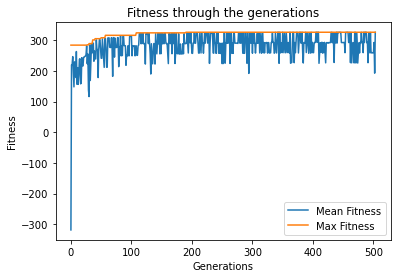

(504, 20)

Threshold outlook:
1 	request 26,	accepted 23
2 	request 84,	accepted 43
3 	request 127,	accepted 49
4 	request 153,	accepted 53
5 	request 144,	accepted 52
6 	request 112,	accepted 53
7 	request 73,	accepted 42
8 	request 17,	accepted 11

77% utilization

57% requests served


jacksondunnandwilliams2780 2020-11-09 12:00:00 attempt #1/3
 52%|█████▏    | 517/1000 [00:02<00:02, 209.61it/s]
Convergence at or above 95% after 517 generations
Last generation: 
[[1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]]

Fitness of the last generation: 
[340 340 340 340 340 340 340 340 340 340 340 340 340 340 340 340 340 331
 340 340]

The optimized parameters for the given inputs are: 
[1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1]

Accepted requests: [ 0  1  2  4  5  6  7  8  9 10 12 13 16 17 18 20 21 22 24 27 28 30 31 3

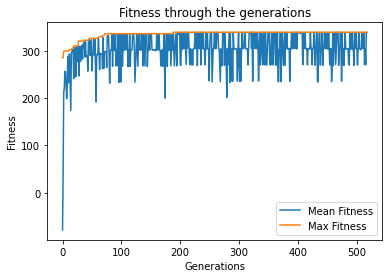

(518, 20)

Threshold outlook:
1 	request 31,	accepted 26
2 	request 60,	accepted 43
3 	request 93,	accepted 53
4 	request 94,	accepted 53
5 	request 80,	accepted 42
6 	request 111,	accepted 53
7 	request 89,	accepted 49
8 	request 30,	accepted 21

80% utilization

66% requests served


jacksondunnandwilliams2780 2020-11-10 12:00:00 attempt #1/3
 50%|█████     | 500/1000 [00:01<00:01, 313.78it/s]
Convergence at or above 95% after 500 generations
Last generation: 
[[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
  1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
  1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
  1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
  1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0
  1 1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 

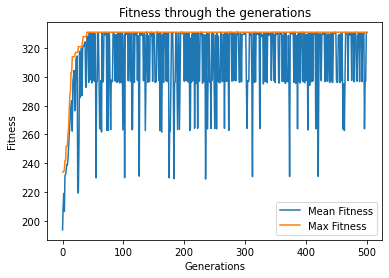

(501, 20)

Threshold outlook:
1 	request 22,	accepted 22
2 	request 39,	accepted 39
3 	request 40,	accepted 36
4 	request 50,	accepted 46
5 	request 59,	accepted 50
6 	request 80,	accepted 53
7 	request 57,	accepted 43
8 	request 48,	accepted 42

78% utilization

79% requests served


jacksondunnandwilliams2780 2020-11-11 12:00:00 attempt #1/3
 50%|█████     | 505/1000 [00:02<00:02, 181.62it/s]
Convergence at or above 95% after 505 generations
Last generation: 
[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]

Fitness of the last generation: 
[338 338 338 338 338 338 338 338 338 338 338 338 338 334 338 338 338 338
 338 338]

The optimized parameters for the given inputs are: 
[1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 0]

Accepted requests: [ 0  1  3  6  7  8 12 13 14 17 20 21 22 25 26 28 31 33

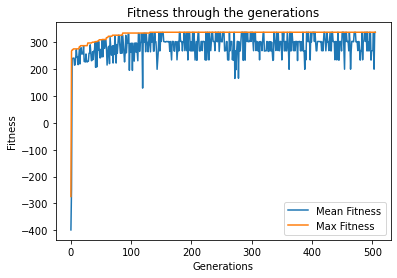

(506, 20)

Threshold outlook:
1 	request 49,	accepted 22
2 	request 84,	accepted 51
3 	request 85,	accepted 39
4 	request 110,	accepted 53
5 	request 128,	accepted 48
6 	request 154,	accepted 53
7 	request 107,	accepted 38
8 	request 55,	accepted 34

80% utilization

53% requests served


jacksondunnandwilliams2780 2020-11-12 12:00:00 attempt #1/3
 50%|█████     | 500/1000 [00:03<00:03, 134.41it/s]
Convergence at or above 95% after 500 generations
Last generation: 
[[1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]]

Fitness of the last generation: 
[360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360 360
 360 360]

The optimized parameters for the given inputs are: 
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 1 0]



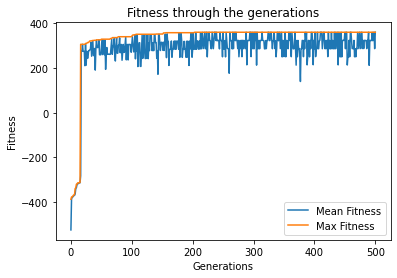

(501, 20)

Threshold outlook:
1 	request 53,	accepted 19
2 	request 97,	accepted 43
3 	request 148,	accepted 53
4 	request 159,	accepted 53
5 	request 176,	accepted 53
6 	request 192,	accepted 53
7 	request 153,	accepted 52
8 	request 80,	accepted 34

85% utilization

45% requests served


jacksondunnandwilliams2780 2020-11-13 12:00:00 attempt #1/3
 53%|█████▎    | 534/1000 [00:02<00:02, 198.01it/s]
Convergence at or above 95% after 534 generations
Last generation: 
[[1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]]

Fitness of the last generation: 
[325 325 325 325 325 325 325 325 325 325 325 325 325 325 325 325 325 325
 325 315]

The optimized parameters for the given inputs are: 
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 1 1 0 1 0]

Accepted requests: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 16 19 21 22 23

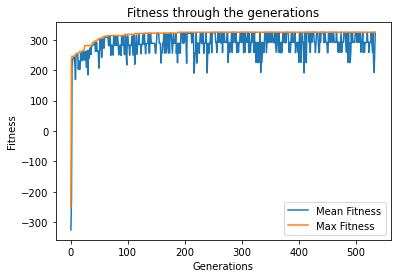

(535, 20)

Threshold outlook:
1 	request 35,	accepted 18
2 	request 72,	accepted 42
3 	request 75,	accepted 38
4 	request 113,	accepted 53
5 	request 133,	accepted 53
6 	request 114,	accepted 51
7 	request 67,	accepted 40
8 	request 47,	accepted 30

77% utilization

63% requests served


jacksondunnandwilliams2780 2020-11-16 12:00:00 attempt #1/3
 50%|█████     | 500/1000 [00:01<00:01, 360.90it/s]
Convergence at or above 95% after 500 generations
Last generation: 
[[1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 0 0]
 [1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1

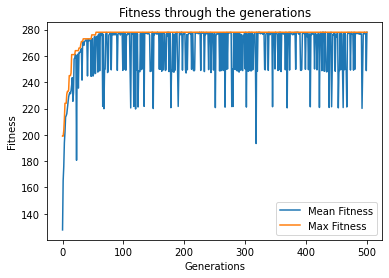

(501, 20)

Threshold outlook:
1 	request 6,	accepted 6
2 	request 34,	accepted 34
3 	request 40,	accepted 40
4 	request 47,	accepted 43
5 	request 73,	accepted 53
6 	request 51,	accepted 46
7 	request 41,	accepted 36
8 	request 25,	accepted 20

66% utilization

85% requests served


jacksondunnandwilliams2780 2020-11-18 12:00:00 attempt #1/3
 50%|█████     | 500/1000 [00:03<00:03, 130.25it/s]
Convergence at or above 95% after 500 generations
Last generation: 
[[1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 ...
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]]

Fitness of the last generation: 
[369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369
 369 369]

The optimized parameters for the given inputs are: 
[1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 0]

Accepted r

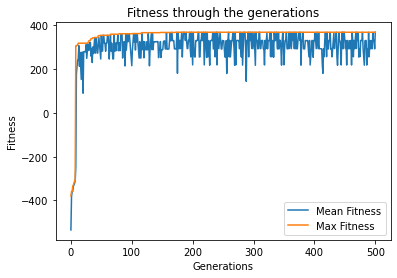

(501, 20)

Threshold outlook:
1 	request 57,	accepted 31
2 	request 99,	accepted 37
3 	request 153,	accepted 53
4 	request 160,	accepted 51
5 	request 195,	accepted 53
6 	request 149,	accepted 52
7 	request 152,	accepted 53
8 	request 92,	accepted 39

87% utilization

48% requests served


maciasparkerandrice2556 2020-11-07 11:30:00 attempt #1/3
 50%|█████     | 503/1000 [00:10<00:10, 46.38it/s]
Convergence at or above 95% after 503 generations
Last generation: 
[[1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 ...
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]]

Fitness of the last generation: 
[1134 1134 1134 1134 1134 1134 1134 1134 1134 1134 1134 1134 1134 1134
 1134 1132 1134 1134 1134 1134]

The optimized parameters for the given inputs are: 
[1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 

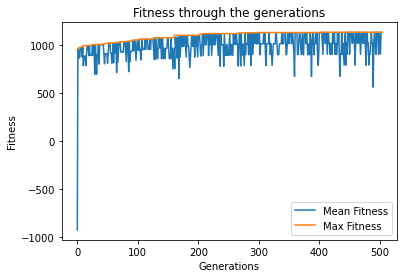

(504, 20)

Threshold outlook:
1 	request 52,	accepted 36
2 	request 96,	accepted 69
3 	request 164,	accepted 96
4 	request 215,	accepted 96
5 	request 226,	accepted 96
6 	request 218,	accepted 96
7 	request 193,	accepted 90
8 	request 171,	accepted 95
9 	request 175,	accepted 96
10 	request 153,	accepted 90
11 	request 133,	accepted 96
12 	request 100,	accepted 82
13 	request 64,	accepted 58
14 	request 39,	accepted 38

84% utilization

63% requests served


maciasparkerandrice2556 2020-11-09 11:30:00 attempt #1/3
 50%|█████     | 502/1000 [00:08<00:08, 57.34it/s]
Convergence at or above 95% after 502 generations
Last generation: 
[[0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]]

Fitness of the last generation: 
[1051 1051 1051 1051 1051 1051 1051 1051 1051 1051 1051 1051 1051 1051
 1051 1051 1039 1051 1051 1051]

The optimized parameters for the given inputs are: 
[0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 

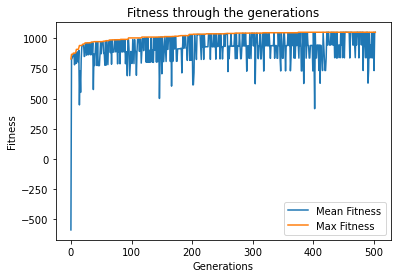

(503, 20)

Threshold outlook:
1 	request 56,	accepted 39
2 	request 111,	accepted 78
3 	request 177,	accepted 96
4 	request 186,	accepted 94
5 	request 162,	accepted 84
6 	request 168,	accepted 90
7 	request 207,	accepted 96
8 	request 207,	accepted 96
9 	request 185,	accepted 96
10 	request 178,	accepted 96
11 	request 112,	accepted 77
12 	request 54,	accepted 51
13 	request 47,	accepted 44
14 	request 14,	accepted 14

78% utilization

62% requests served


maciasparkerandrice2556 2020-11-10 11:30:00 attempt #1/3
 53%|█████▎    | 526/1000 [00:08<00:08, 59.15it/s]
Convergence at or above 95% after 526 generations
Last generation: 
[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]]

Fitness of the last generation: 
[1095 1095 1095 1095 1095 1095 1095 1095 1095 1095 1095 1095 1095 1095
 1095 1085 1095 1095 1095 1095]

The optimized parameters for the given inputs are: 
[1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 

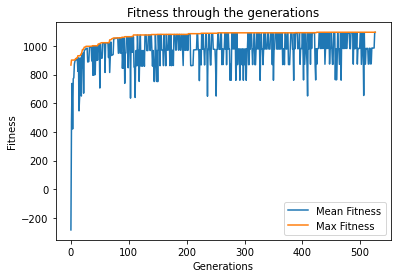

(527, 20)

Threshold outlook:
1 	request 42,	accepted 32
2 	request 89,	accepted 57
3 	request 171,	accepted 95
4 	request 184,	accepted 96
5 	request 194,	accepted 95
6 	request 181,	accepted 90
7 	request 165,	accepted 96
8 	request 160,	accepted 95
9 	request 108,	accepted 72
10 	request 134,	accepted 96
11 	request 125,	accepted 96
12 	request 91,	accepted 81
13 	request 64,	accepted 60
14 	request 34,	accepted 34

81% utilization

66% requests served


maciasparkerandrice2556 2020-11-11 11:30:00 attempt #1/3
 80%|████████  | 803/1000 [00:16<00:04, 48.59it/s]
Convergence at or above 95% after 803 generations
Last generation: 
[[1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]]

Fitness of the last generation: 
[1094 1094 1094 1094 1094 1094 1094 1094 1094 1094 1082 1094 1094 1094
 1094 1094 1094 1094 1094 1094]

The optimized parameters for the given inputs are: 
[1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0

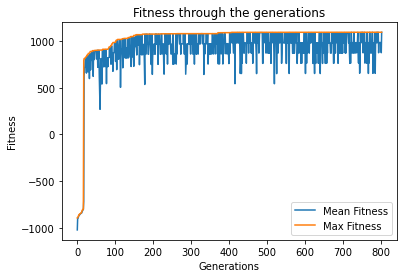

(804, 20)

Threshold outlook:
1 	request 74,	accepted 55
2 	request 143,	accepted 96
3 	request 129,	accepted 87
4 	request 81,	accepted 62
5 	request 143,	accepted 96
6 	request 164,	accepted 96
7 	request 157,	accepted 87
8 	request 199,	accepted 96
9 	request 228,	accepted 94
10 	request 224,	accepted 96
11 	request 228,	accepted 96
12 	request 151,	accepted 59
13 	request 91,	accepted 45
14 	request 34,	accepted 29

81% utilization

54% requests served


maciasparkerandrice2556 2020-11-13 11:30:00 attempt #1/3
 54%|█████▍    | 542/1000 [00:19<00:16, 27.81it/s]
Convergence at or above 95% after 542 generations
Last generation: 
[[1 0 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 ...
 [1 0 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]]

Fitness of the last generation: 
[1205 1205 1205 1205 1205 1205 1205 1205 1205 1205 1200 1205 1205 1205
 1205 1205 1205 1205 1205 1205]

The optimized parameters for the given inputs are: 
[1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 

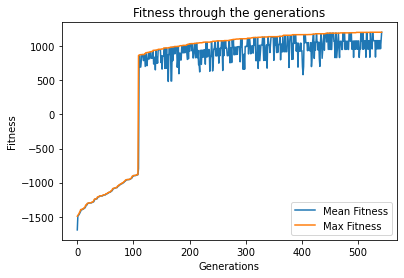

(543, 20)

Threshold outlook:
1 	request 82,	accepted 40
2 	request 144,	accepted 77
3 	request 201,	accepted 94
4 	request 257,	accepted 96
5 	request 308,	accepted 96
6 	request 328,	accepted 92
7 	request 343,	accepted 94
8 	request 362,	accepted 96
9 	request 384,	accepted 95
10 	request 341,	accepted 96
11 	request 273,	accepted 94
12 	request 201,	accepted 94
13 	request 145,	accepted 91
14 	request 65,	accepted 50

90% utilization

42% requests served


maciasparkerandrice2556 2020-11-14 11:30:00 attempt #1/3
 50%|█████     | 505/1000 [00:08<00:08, 61.84it/s]
Convergence at or above 95% after 505 generations
Last generation: 
[[1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 ...
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]
 [1 0 1 ... 1 1 0]]

Fitness of the last generation: 
[1091 1091 1091 1091 1091 1091 1091 1091 1091 1091 1091 1091 1091 1091
 1091 1091 1091 1091 1088 1091]

The optimized parameters for the given inputs are: 
[1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

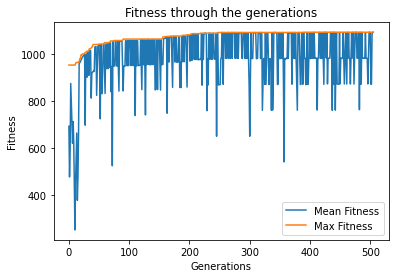

(506, 20)

Threshold outlook:
1 	request 36,	accepted 32
2 	request 85,	accepted 70
3 	request 106,	accepted 87
4 	request 125,	accepted 96
5 	request 153,	accepted 96
6 	request 157,	accepted 96
7 	request 141,	accepted 95
8 	request 132,	accepted 94
9 	request 142,	accepted 96
10 	request 135,	accepted 92
11 	request 137,	accepted 95
12 	request 98,	accepted 70
13 	request 59,	accepted 45
14 	request 32,	accepted 27

81% utilization

69% requests served


maciasparkerandrice2556 2020-11-17 11:30:00 attempt #1/3
 50%|█████     | 502/1000 [00:06<00:06, 79.11it/s]
Convergence at or above 95% after 502 generations
Last generation: 
[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]

Fitness of the last generation: 
[1056 1056 1056 1056 1056 1056 1056 1056 1056 1056 1056 1056 1056 1056
 1056 1050 1056 1056 1056 1056]

The optimized parameters for the given inputs are: 
[1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

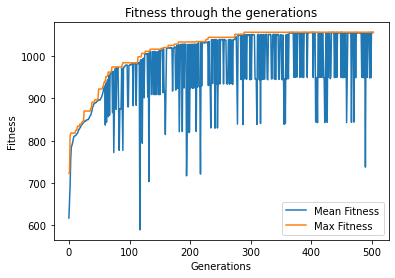

(503, 20)

Threshold outlook:
1 	request 54,	accepted 52
2 	request 77,	accepted 70
3 	request 119,	accepted 96
4 	request 122,	accepted 96
5 	request 105,	accepted 79
6 	request 106,	accepted 86
7 	request 109,	accepted 96
8 	request 116,	accepted 96
9 	request 97,	accepted 75
10 	request 110,	accepted 85
11 	request 121,	accepted 96
12 	request 63,	accepted 59
13 	request 58,	accepted 54
14 	request 17,	accepted 16

79% utilization

81% requests served


maciasparkerandrice2556 2020-11-18 11:30:00 attempt #1/3
100%|██████████| 1000/1000 [00:30<00:00, 32.68it/s]
Not converging
Last generation: 
[[0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]]

Fitness of the last generation: 
[1209 1208 1208 1208 1208 1208 1208 1208 1208 1208 1188 1202 1208 1208
 1208 1208 1208 1208 1208 1208]

maciasparkerandrice2556 2020-11-18 11:30:00 attempt #2/3
 87%|████████▋ | 874/1000 [00:26<00:03, 32.68it/s]
Convergence at or above 95% aft

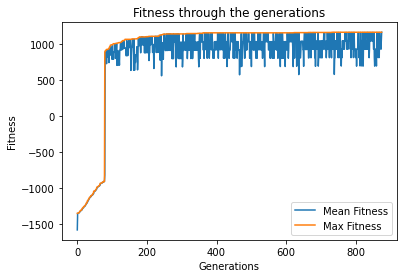

(875, 20)

Threshold outlook:
1 	request 113,	accepted 48
2 	request 207,	accepted 81
3 	request 279,	accepted 96
4 	request 287,	accepted 96
5 	request 326,	accepted 96
6 	request 310,	accepted 96
7 	request 293,	accepted 96
8 	request 260,	accepted 85
9 	request 257,	accepted 96
10 	request 261,	accepted 96
11 	request 253,	accepted 96
12 	request 180,	accepted 96
13 	request 96,	accepted 52
14 	request 54,	accepted 30

86% utilization

43% requests served


maciasparkerandrice2556 2020-11-20 11:30:00 attempt #1/3
 54%|█████▍    | 539/1000 [00:12<00:10, 41.94it/s]
Convergence at or above 95% after 539 generations
Last generation: 
[[0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]]

Fitness of the last generation: 
[1135 1135 1135 1135 1135 1135 1135 1135 1135 1135 1135 1135 1135 1135
 1133 1135 1135 1135 1135 1135]

The optimized parameters for the given inputs are: 
[0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 

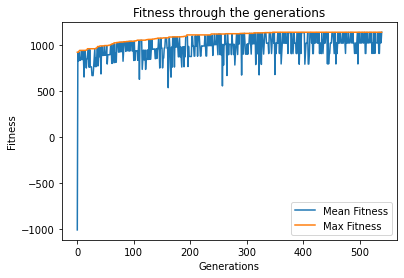

(540, 20)

Threshold outlook:
1 	request 59,	accepted 46
2 	request 124,	accepted 88
3 	request 162,	accepted 94
4 	request 222,	accepted 96
5 	request 230,	accepted 96
6 	request 214,	accepted 96
7 	request 180,	accepted 76
8 	request 179,	accepted 89
9 	request 182,	accepted 96
10 	request 225,	accepted 96
11 	request 195,	accepted 96
12 	request 133,	accepted 70
13 	request 87,	accepted 63
14 	request 38,	accepted 33

84% utilization

60% requests served


maciasparkerandrice2556 2020-11-12 11:30:00 attempt #1/3
 50%|█████     | 501/1000 [00:00<00:00, 753.31it/s]
Convergence at or above 95% after 501 generations
Last generation: 
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]]

Fitness of the last generation: 
[32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32]

The optimized parameters for the given inputs are: 
[1 1]

Accepted requests: [0 1] 



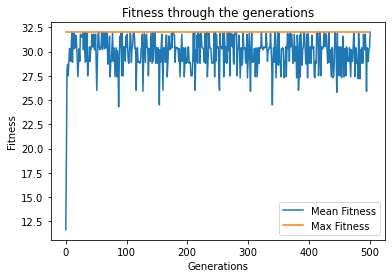

(502, 20)

Threshold outlook:
1 	request 0,	accepted 0
2 	request 2,	accepted 2
3 	request 5,	accepted 5
4 	request 5,	accepted 5
5 	request 5,	accepted 5
6 	request 5,	accepted 5
7 	request 5,	accepted 5
8 	request 5,	accepted 5
9 	request 0,	accepted 0
10 	request 0,	accepted 0
11 	request 0,	accepted 0
12 	request 0,	accepted 0
13 	request 0,	accepted 0
14 	request 0,	accepted 0

2% utilization

100% requests served




In [29]:
HouseKeeping().genetic_algorithm_check(all_days=True, plot=True)

In [ ]:
util.load_table('dummy_rsv', 'dummy.db')

In [ ]:
# H. Reservation Report

In [ ]:
HouseKeeping().linear_check(all_days=True)

In [ ]:
util.load_table('dummy_rsv_report', 'dummy.db')

In [ ]:
# I. Query Report & Reservation Status Check

In [3]:
# create table if not exist
# util.create_qry_report_table('dummy_qry_report', 'dummy.db')

In [4]:
HouseKeeping().summarize_query(plot=True)

100%|██████████| 17032/17032 [00:09<00:00, 1707.28it/s]
bestplc5637
100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
humphreysingleton4490
100%|██████████| 11/11 [00:01<00:00,  6.10it/s]
jacksondunnandwilliams2780
100%|██████████| 12/12 [00:00<00:00, 14.75it/s]
maciasparkerandrice2556
100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
swansonllc2908
100%|██████████| 11/11 [00:01<00:00,  7.27it/s]


In [7]:
util.load_table('dummy_qry_report', 'dummy.db').sample(5)

,id,establishment,timestamp,period,n_total,DuplicateExist,FinalizeReservation,OfferSlots,OversizedGroup,PlaceNotAvail,OutsideOpenDays,InThePast,OnHoldReservation,TooSoon
29,0.0,jacksondunnandwilliams2780,20/11/08_19:49:34.658185,20/11/11,126,0.0,0.0,0.0,34.12698412698413,0.0,0.0,0.0,65.87301587301587,0.0
18,0.0,humphreysingleton4490,20/11/08_19:49:32.630395,20/11/13,208,0.9615384615384616,56.73076923076923,1.4423076923076923,40.38461538461539,0.4807692307692308,0.0,0.0,0.0,0.0
44,0.0,maciasparkerandrice2556,20/11/08_19:49:38.102968,20/11/18,665,0.0,0.0,0.0,45.714285714285715,0.0,0.0,0.0,54.285714285714285,0.0
56,0.0,swansonllc2908,20/11/08_19:49:41.116040,20/11/20,203,0.49261083743842365,56.65024630541872,0.0,41.37931034482759,1.477832512315271,0.0,0.0,0.0,0.0
41,0.0,maciasparkerandrice2556,20/11/08_19:49:37.595768,20/11/14,319,0.0,0.0,0.0,39.49843260188088,0.0,0.0,0.0,60.50156739811912,0.0


In [7]:
# check reservation
session = '021'
intent = 'CheckReservation'
patron = 'brittanymartinez120418'
establishment = 'jacksondunnandwilliams2780'

# customer request
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

You have these reservation(s):
(1) Wednesday 11 November 2020 at 15:00 to 17:15 for 5 person(s) is unsuccessful
I am afraid your request for Wednesday 11 November 2020 at 15:00 is not among the 55% that were accepted.
We are at 91% capacity on this day.
It is advised to do a walk-in at our least busy hour at 18:00 or 11:00.


In [1]:
# J. Simulation Data

In [13]:
import util

In [14]:
# if dummy.db does not already exit, run this
# otherwise, use other db name for new db: 
# util.init_db(db='other_name')
# then modify the config.ini
util.init_db()

In [15]:
util.create_dummy_appointments()

Day #0
100%|██████████| 48/48 [00:06<00:00,  7.41it/s]
Day #1
100%|██████████| 73/73 [00:10<00:00,  6.87it/s]
Day #2
100%|██████████| 65/65 [00:12<00:00,  5.32it/s]


In [ ]:
# You may now use the simulated data (dummy appointments) to run section G, H, I